<a href="https://colab.research.google.com/github/nicklausmillican/StatisticalRethinkingIISolutions/blob/main/StatisticalRethinkingSolutions2_Ch6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6

In [1]:
install.packages(c("coda","mvtnorm","devtools","loo","dagitty"))
devtools::install_github("rmcelreath/rethinking@slim")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘Rcpp’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’, ‘checkmate’, ‘matrixStats’, ‘V8’





shape (NA -> 1.4.6) [CRAN]


Installing 1 packages: shape

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpNLUdkZ/remotes8a46f01cc5/rmcelreath-rethinking-cbcb8ba/DESCRIPTION’ ... OK
* preparing ‘rethinking’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘rethinking_2.13.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(rethinking)

Loading required package: parallel

rethinking (Version 2.13.2)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




## Easy

### 6E1-6E2
#### Questions
1.   List three mechanisms by which multiple regression can produce false inferences about causal effects.
2.  For one of the mechanisms in the previous problem, provide an example of your choice, perhaps from your own research.

#### Answer
The mechanisms discussed in Chapter 6 were:
*   **Multicollinearity:**  When (sets of) predictor variables are strongly associated to the point of nearly collinear.  Sometimes, this can cause instability in the model--making it difficult for the algorithm to converge on an estimate.  But even with convergence, the posterior will be hard to interpret.  This is because the model's job is attribute information among explanatory variables, but multicollinearity means that the collinear explanatory variables share information; the model, then, must be uncertain how to attribute information among the collinear variables.  The result is often very wide credibility intervals for the collinear parameters.  

   An example of multicollinearity might be modeling test outcomes on students an including as explanatory variables *amount of time slept night before exam* and *amount of time spent studying on night before exam*.  The could be collinear since time spent sleeping/studying could reduce time spent stuyding/sleeping.
*   **Omitted-Variable Bias:** This occurs when an explanatory variable is omitted from the regression.  Just because the regression omits an important explanatory variable does not change the fact that that explanatory variable is important in determining the outcome.  Say we model $y_i = \alpha + \beta x + \epsilon$, but we have unintentionally omitted the explanatory variable $w$.  The influence of $w$ on $y$ is still present in the data, we're just not recognizing it.  Where does that influence go in our regression?  If it is completely orthogonal (unrelated) to $x$, then the influence of $w$ gets *sponged up* by $\epsilon$.  But to the extent that $w$ and $x$ are collinear (associated), the influence of $w$ on $y$ is also sponged up $\beta$.  Thus, even though we will think $\beta$ represents the effect of $x$ on $y$, it will actually additionally represent part of the effect of $w$ on $y$.  

   For example, if an important explantory variable in student test performance is *quality of teaching*, omitting it will increase the error in the posterior and skew the estimate for *previous night's sleep* insofar as quality of teaching is associated with previous night's sleep (for example, good teaching may alleviate the need for last minute cramming).
*   **Post-Treatment Bias:** Look at the DAG X -> M -> Y; imagine that $X$ is a treatment that acts on $Y$ via $M$.  Conditioning on a *mediator* variable $M$ will *screen off* the causal effect of $X$ on $Y$.  $X$ affects $Y$ via $M$; including a variable in regression is akin to holding its value constant; thus, including $M$ is akin to holding its value constant, but its value must flucuate with $X$ in order to cause $Y$ to also change.  

   Here's an example.  Suppose that we study a drug $X$ that is hypothesized to reduce heart attack $Y$.  It works via reducing blood pressure $M$.  If we regress $Y$ on both $X$ and $M$, the apparent effect of the drug $X$ will be eliminated.
*   **Collider Bias/Selection Bias:** The text discusses 3 main causal motiffs.
   *   *Mediators* or *Pipes*:  X -> M -> Y
   *   *Forks*: X <- F -> Y
   *   *Colliders*: X -> C <- Y

   The collider is unique among these because, whereas conditioning on the non-X/Y variable in mediators (M) or forks (F) blocks the flow of information between X and Y, conditioning on C opens informational flow.  Informational flow is detected as association in regression; if we're not aware of the effects on informational flow from conditioning on a collider, the induced association between X and Y can be falsely interpretted as a causal effect of X on Y.  This is collider bias.  Collider bias can also be called "selection bias" because the conditioning on a common cause of X and Y *selects* certain observations that will bias inference.  
   
  An example.  Say the true state of the world is that previous-night's studying does NOT affect test performance, but it does affect students' confidence (Study -> Confidence).  Teacher Quality also affects confidence; unlike previous-night's studying, teacher quality DOES affect test performance (Confidence <- Teacher -> Test).  Altogether, our DAG looks like Study -> Confidence <- Teacher -> Test (we see that Confidence is a collider between Study and Teacher).  Now we set up our regression; for whatever reason, we hypothesize that Study and Confidence cause Test performance, but fail to consider Teacher.  Even though neither Study nor Confidence affect test performance, conditioning on Confidence opens the collider between Study and Teacher.  The result: the regression will reveal an effect of Study on Test even though this does not exist in reality.
*   **Confounding:** Confounding is a consequence of the *Fork* motif; X and Y are both common consequences of F.  Even though X does not affect Y (or vice versa), they are associated in the data.  We eliminate this by conditioning on F.

   Say we regress test performance only on Confidence for the DAG above (Study -> Confidence <- Teacher -> Test).  There will be an association between Confidence and Test because both are consequences of Teacher.  We must additionally condition on Teacher to prevent this.

### 6E3
#### Question
List the four elemental confounds.  Can you explain the conditional dependencies of each?

#### Answer
| Relationship   | Causal Structure                           | Conditional Independence           |
|----------------|--------------------------------------------|-----------------------------------|
| Fork           | $ X \leftarrow F \rightarrow Y $          | $ X \perp Y | F $                 |
| Pipe/Mediator  | $ X \rightarrow M \rightarrow Y $         | $ X \perp Y | M $                 |
| Collider       | $ X \rightarrow C \leftarrow Y $          | $ X \not\perp Y | C $             |
| Descendant     | An effect of another variable. | Conditioning on a descendant has similar effects to conditioning on its cause.

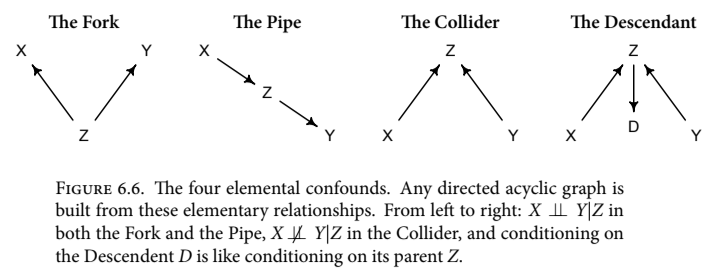

If you want to learn more about causal inference, DAGs, and the structures, you might want to read [Causal Inference in Statistics, A Primer](https://www.amazon.com/Causal-Inference-Statistics-Judea-Pearl/dp/1119186846/ref=sr_1_6?crid=20JMY35NM4KTE&dib=eyJ2IjoiMSJ9.5C96FL9QzT0Lor4-NksVSMOKm0mLiYsNMSLCvgkuMvVW8Zci32VXNUU-a9BKTGgK4sXFT0WJbXjTzKYEZpLguT1nVpqqKOuGbVGETv0mdh5R534cx1AzBiRAAw6lznqF992TUKmrWb6k0JDAF7ituRq2cieJY8b31UFIBeIAq7Dt0pN_rHA9pTUqqbjNRdx-fb1QGSvS9Ti0TpsF8FsprrDQPahlaLy6S7mSxlcMAzCRMmZgXUhTBu8h_Q7cBRFO_Hb9pCqwNY03mKTaUHmw8yiefQT1uJyIxbxB31HZS0Q.9prpm7TKO6S9DRVsWK_cSTCg6FJbAxpxp6UDNlplVwI&dib_tag=se&keywords=Causal+inference&qid=1708349476&sprefix=causal+inferenc%2Caps%2C421&sr=8-6)